In [3]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data set

In [4]:
#1 checkpoint 1- import the data

df=pd.read_csv('bank.csv')
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


#2 Identify the Features data types before entering into the analysis

In [132]:
#2
df.dtypes

age             int64
job          category
marital      category
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
Season         object
dtype: object

In [33]:
#to convert the datatypes as per the given data
def func_conversion(a):
    df[a]=df[a].astype('category')
    
func_conversion('job')
func_conversion('marital')
func_conversion('education')
func_conversion('contact')
func_conversion('poutcome')
    

In [34]:
df.dtypes

age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

In [35]:
#2 to check the missing data
df.isnull().sum().sum()


0

In [37]:
#3 to find average balance of a customer

r=df.groupby(by='y')['balance'].mean()
r

y
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64

Text(0.5, 1.0, 'Average balanve vs Subscription')

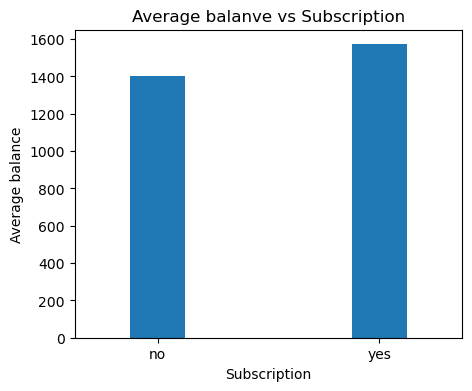

In [38]:
#3 plot the average balance
r.plot(kind='bar',figsize=(5,4),rot=0,width=0.25)
plt.xlabel('Subscription')
plt.ylabel('Average balance')
plt.title('Average balanve vs Subscription')

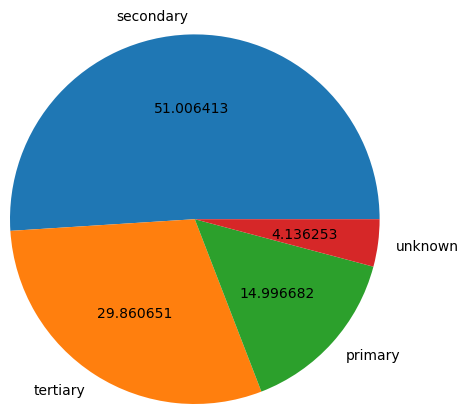

In [39]:
#4
a=df.education.value_counts()
plt.figure(figsize=(4,4))
plt.pie(x=a.values,labels=a.index,autopct='%2f',radius=1.5)
plt.show()

In [41]:
#5  create a function

def get_season(month):
    if month in ['dec','jan','feb']:
        return 'winter'
    elif month in ['mar','apr','may']:
        return 'spring'
    elif month in ['jun','jul','aug']:
        return 'summer'
    else:
        return 'Fall'
   

#### Apply the function to create season column in the dataframe df   

df['Season'] = df['month'].apply(get_season)


In [42]:
import seaborn as sns
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Fall
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,winter


<Axes: xlabel='count', ylabel='Season'>

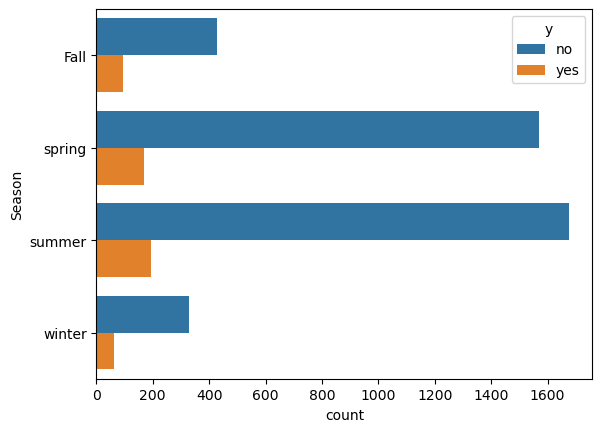

In [43]:
#6 count plot
sns.countplot(y=df.Season,hue=df.y)

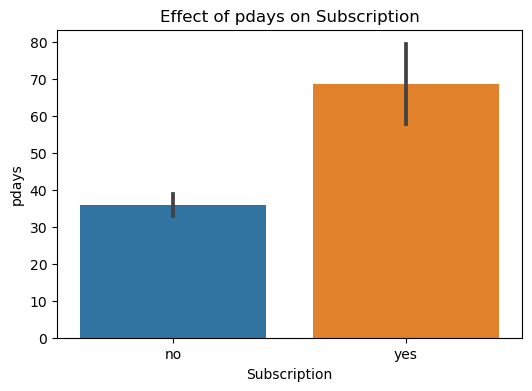

In [44]:
#7

plt.figure(figsize=(6,4))
sns.barplot(x=df.y,y=df.pdays)
plt.title("Effect of pdays on Subscription")
plt.xlabel("Subscription")
plt.ylabel("pdays")
plt.show()

In [45]:
#8
import numpy as np
df['pdays'].replace({-1:np.NaN},inplace=True)
print('The dataframe df after replacing -1 with NaN in pdays column is:\n',df)

The dataframe df after replacing -1 with NaN in pdays column is:
       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes  

Text(0, 0.5, 'pdays')

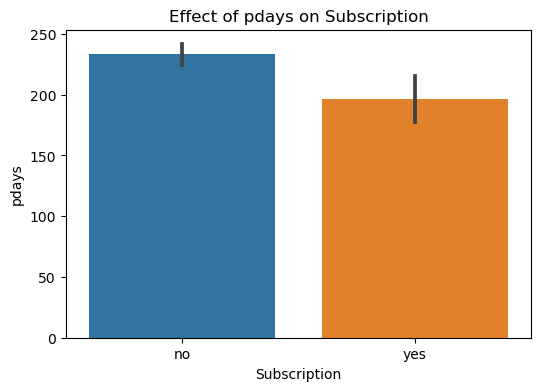

In [46]:
#9

plt.figure(figsize=(6,4))
sns.barplot(x=df.y,y=df.pdays)
plt.title("Effect of pdays on Subscription")
plt.xlabel("Subscription")
plt.ylabel("pdays")


<Axes: xlabel='y', ylabel='balance'>

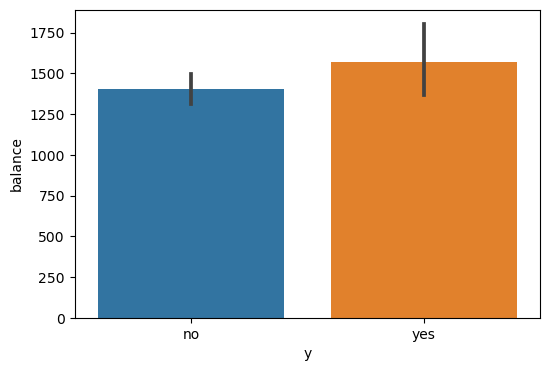

In [47]:
#10
# with zero balance also there are subscriptions and non-subscriptions

plt.figure(figsize=(6,4))
sns.barplot(x=df.y,y=df.balance)


In [48]:
df.groupby(by='job')['balance'].max()

job
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337
Name: balance, dtype: int64

In [49]:
#11

pd.pivot_table(data=df,index='job',values='balance',aggfunc='max')

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


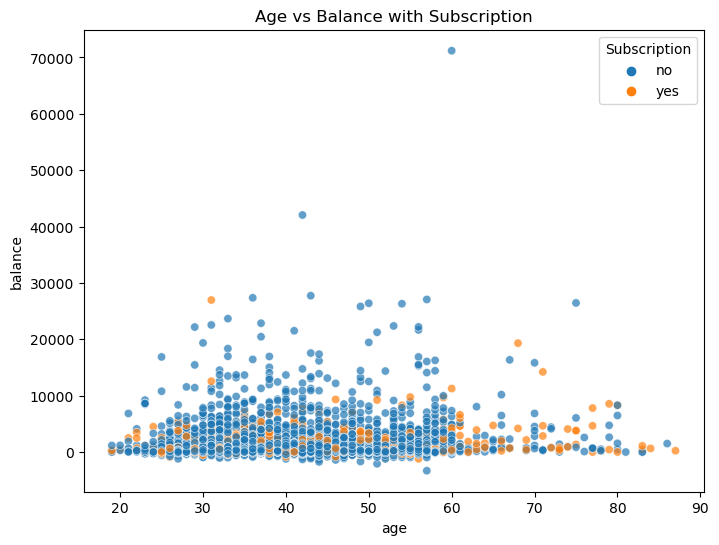

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='y',alpha=0.7)
plt.title("Age vs Balance with Subscription")
plt.legend(title='Subscription')
plt.show()

observations from the above plot:
1)We can see from the above plot that when the age of customer is on the lower side then the data points are more and subscriptions are less comapritively where as when the age of the customer is on the higer side then the data points are lesser but the subscriptions are higher comparitively.
2)The two outliers in the balance data have not subscribed.

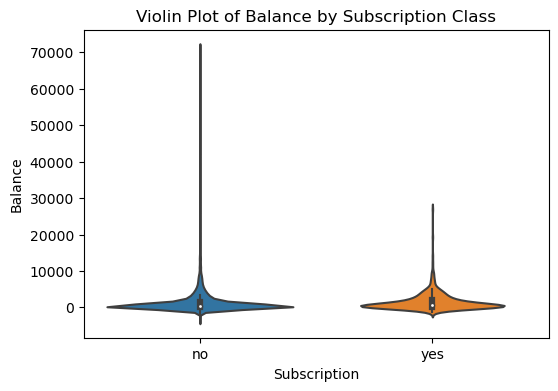

In [51]:
#violin plot
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='y', y='balance')
plt.title("Violin Plot of Balance by Subscription Class")
plt.xlabel("Subscription")
plt.ylabel("Balance") 
plt.show()

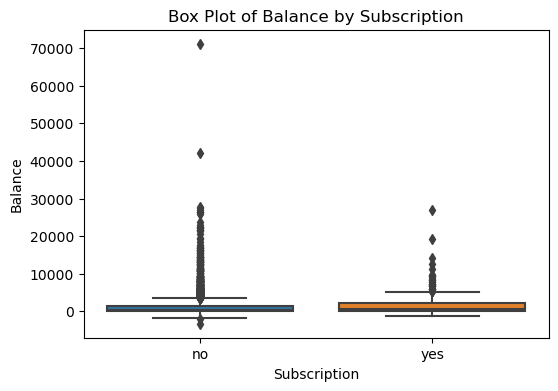

In [52]:
#box plot
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='y', y='balance')
plt.title("Box Plot of Balance by Subscription")
plt.xlabel("Subscription")
plt.ylabel("Balance")

plt.show()

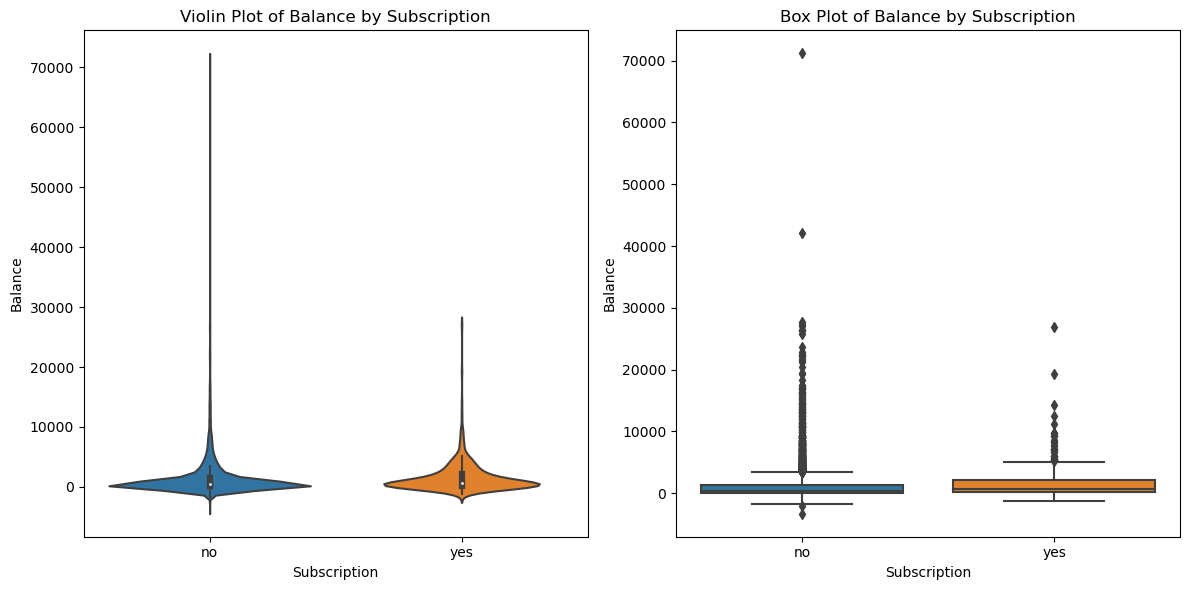

In [53]:
#PLotting the violin and box plot side by side 
plt.figure(figsize=(12, 6))

# Violin plot
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='y', y='balance')
plt.title("Violin Plot of Balance by Subscription")
plt.xlabel("Subscription")
plt.ylabel("Balance")

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='balance')
plt.title("Box Plot of Balance by Subscription")
plt.xlabel("Subscription")
plt.ylabel("Balance")

plt.tight_layout()
plt.show()

The violin plot helps provide info about the distribution's shape and density, whereas the box plot focuses on summary statistics such as quartiles, median, and potential outliers.

Violin Plot: The violin plot displays the entire probability distribution of the data, including insights into its shape and multiple modes. This is useful when we want to understand the multimodal nature of the distribution, if any. It provides a more detailed view of the data's distribution and density.

Box Plot: The box plot provides a visual representation of summary statistics such as quartiles and potential outliers. It offers a clear view of the central tendency and variability of the data. The inclusion of potential outliers in the box plot helps identify extreme values.

Using both plots together(Violin and Box plot) can provide a holistic view of the data distribution. While the violin plot gives you a deeper understanding of the distribution's shape, the box plot offers a concise summary of key statistics. Together, they provide a comprehensive analysis of the 'balance' distribution for each subscription class, offering insights into potential trends and variations.

14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.

In [54]:
defaulter_count = df[df['default'] == 'yes'].shape[0]
defaulter_count

76

In [55]:
non_defaulter_count = df[df['default'] == 'no'].shape[0]
non_defaulter_count

4445

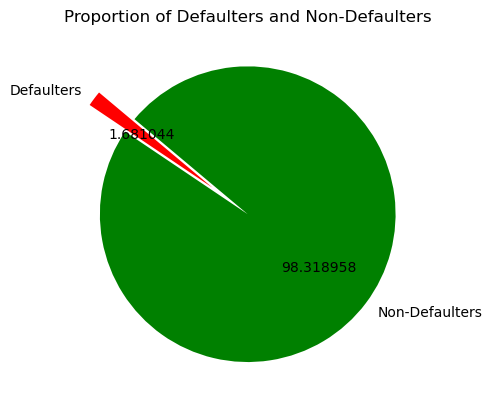

In [56]:
labels = ['Defaulters', 'Non-Defaulters']
sizes = [defaulter_count, non_defaulter_count]

plt.pie(sizes, labels=labels, autopct='%2f', startangle=140, colors=['red', 'green'], explode=(0.3, 0),radius=1)
plt.title("Proportion of Defaulters and Non-Defaulters")
plt.show()

15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots

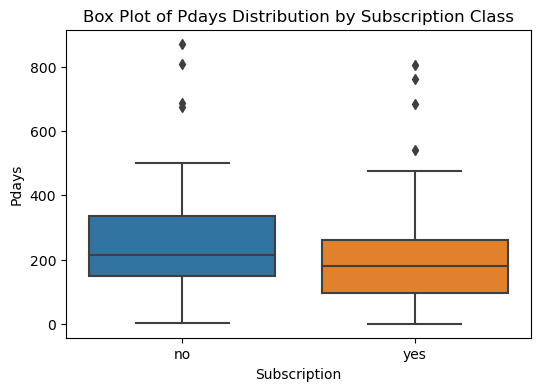

In [57]:
plt.figure(figsize=(6, 4))

# Box plot
sns.boxplot(data=df, x='y', y='pdays')
plt.title("Box Plot of Pdays Distribution by Subscription Class")
plt.xlabel("Subscription")
plt.ylabel("Pdays")
plt.show()

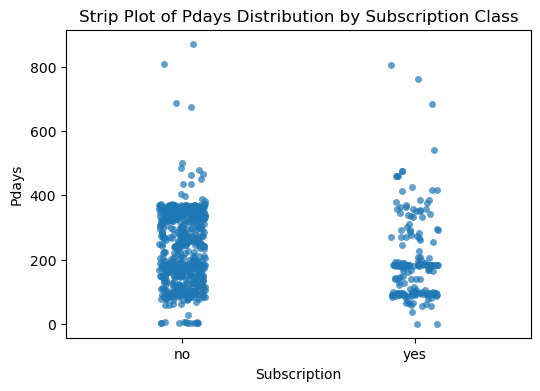

In [58]:
plt.figure(figsize=(6, 4))

# Strip plot
sns.stripplot(data=df, x='y', y='pdays', jitter=True, alpha=0.7)#Jitter is added to prevent overlap of points, making it easier to see concentration areas.
plt.title("Strip Plot of Pdays Distribution by Subscription Class")
plt.xlabel("Subscription")
plt.ylabel("Pdays")
plt.show()

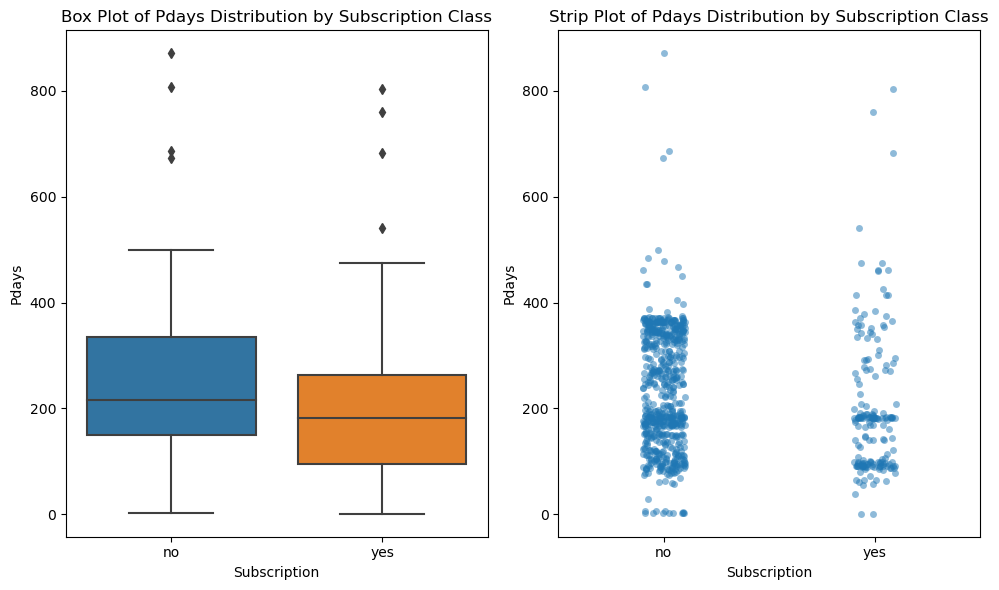

In [59]:
#Plotting both Box plot and strip plot side by side
plt.figure(figsize=(10, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='y', y='pdays')
plt.title("Box Plot of Pdays Distribution by Subscription Class")
plt.xlabel("Subscription")
plt.ylabel("Pdays")

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='y', y='pdays', jitter=True, alpha=0.5)#Jitter is added to prevent overlap of points, making it easier to see concentration areas.
plt.title("Strip Plot of Pdays Distribution by Subscription Class")
plt.xlabel("Subscription")
plt.ylabel("Pdays")

plt.tight_layout()
plt.show()

Box Plot: A box plot shows the distribution's central tendency (median, quartiles) and potential outliers. It provides a clear summary of the data distribution, helping to understand the overall spread of the data.

Strip Plot: A strip plot shows individual data points, allowing you to observe the density and distribution of individual values.

Using both plots together can provide us a more complete understanding of the distribution of 'pdays' with respect to the subscription classe. It allows us to assess summary statistics and individual data points simultaneously.